In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,json,ast,sqlalchemy
from termcolor import colored
from ast import literal_eval
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


### 1. Load the data

In [9]:
df1 = pd.read_csv('feb_half1_2019_6m.csv')
print(df1.shape)
df1[1:].head()

(6156514, 44)


,index,camera_id,time_stamp,collision_distance,distance,hdop,satellite,speed,location,trip_start,...,speed_skor,focus_skor,guard_skor,lat,lon,timezone,version,event,heading,dbm
1,2452,861107036575059,2019-02-01 00:08:47.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
2,1,861107036575059,2019-02-01 00:08:48.544,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
3,2453,861107036575059,2019-02-01 00:08:49.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
4,2,861107036575059,2019-02-01 00:08:50.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
5,2454,861107036575059,2019-02-01 00:08:51.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0


In [6]:
df2 = pd.read_csv('feb_half2_2019_8m.csv')
print(df2.shape)
df2[1:].head()

(8098762, 44)


,index,camera_id,time_stamp,collision_distance,distance,hdop,satellite,speed,location,trip_start,...,speed_skor,focus_skor,guard_skor,lat,lon,timezone,version,event,heading,dbm
1,2719,861107036575463,2019-02-15 00:24:35.702,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-15 00:24:32.97,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
2,1,861107036575463,2019-02-15 00:24:36.701,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-15 00:24:32.97,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
3,2720,861107036575463,2019-02-15 00:24:37.701,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-15 00:24:32.97,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
4,2,861107036575463,2019-02-15 00:24:38.700,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-15 00:24:32.97,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
5,2721,861107036575463,2019-02-15 00:24:39.701,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-15 00:24:32.97,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0


In [7]:
df3 = pd.read_csv('mar_half1_2019_8m.csv')
print(df3.shape)
df3[1:].head()

(8292130, 44)


,index,camera_id,time_stamp,collision_distance,distance,hdop,satellite,speed,location,trip_start,...,speed_skor,focus_skor,guard_skor,lat,lon,timezone,version,event,heading,dbm
1,142991,867732032203374,2019-03-01 00:06:39.647,0.0,0.0,1.2,6.0,0.0,"24.6799,114.9625",2019-03-01 00:06:34.751,...,100.0,NaN,NaN,24.6799,114.963,NaN,NaN,normal,0.0,-51.0
2,137339,867732032203374,2019-03-01 00:06:40.648,0.0,0.0,1.0,7.0,0.0,"24.6799,114.9625",2019-03-01 00:06:34.751,...,100.0,NaN,NaN,24.6799,114.963,NaN,NaN,normal,0.0,-51.0
3,142992,867732032203374,2019-03-01 00:06:41.648,0.0,0.0,1.0,7.0,0.0,"24.6799,114.9625",2019-03-01 00:06:34.751,...,100.0,NaN,NaN,24.6799,114.963,NaN,NaN,normal,0.0,-51.0
4,137340,867732032203374,2019-03-01 00:06:42.648,0.0,0.0,1.0,7.0,0.0,"24.6799,114.9625",2019-03-01 00:06:34.751,...,100.0,NaN,NaN,24.6799,114.963,NaN,NaN,normal,0.0,-51.0
5,142993,867732032203374,2019-03-01 00:06:43.647,0.0,0.0,1.0,7.0,0.0,"24.6799,114.9625",2019-03-01 00:06:34.751,...,100.0,NaN,NaN,24.6799,114.963,NaN,NaN,normal,0.0,-51.0


In [8]:
df4 = pd.read_csv('jan_2019_10m.csv')
print(df4.shape)
df4[1:].head()

(10266245, 44)


,index,camera_id,time_stamp,collision_distance,distance,hdop,satellite,speed,location,trip_start,...,speed_skor,focus_skor,guard_skor,lat,lon,timezone,version,event,heading,dbm
1,7576,861107036063171,2019-01-01 06:19:26.137,NaN,NaN,NaN,NaN,NaN,"0.0000,0.0000",2019-01-01 06:19:26.137,...,NaN,NaN,NaN,0.0,0.0,-24.0,"['CV150S-C1_1.2.0', '100']",Low Power Mode [0] - Wake Up GPS Activation Fail,NaN,NaN
2,26590,861107036037902,2019-01-01 09:03:44.839,NaN,NaN,NaN,NaN,NaN,"0.0000,0.0000",2019-01-01 09:03:44.839,...,NaN,NaN,NaN,0.0,0.0,-24.0,"['CV150S-C1_1.2.6', '100']",Low Power Mode [1] - Wake Up GPS Activation Fail,NaN,NaN
3,0,861107036165695,2019-01-01 09:22:01.438,NaN,NaN,NaN,NaN,NaN,"0.00000,0.00000",2019-01-01 09:22:01.438,...,NaN,NaN,NaN,0.0,0.0,36.0,"['CV150S-P1_1.3.2', '100', '81207']",CarVi Activated,NaN,NaN
4,11978,861107036165695,2019-01-01 09:22:05.194,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-01-01 09:22:01.438,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,-57.0
5,1,861107036165695,2019-01-01 09:22:06.193,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-01-01 09:22:01.438,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,-57.0


In [13]:
df = df1.append(df2).append(df3).append(df4)
print(df.shape)
df.head()

(32813651, 44)


,index,camera_id,time_stamp,collision_distance,distance,hdop,satellite,speed,location,trip_start,...,speed_skor,focus_skor,guard_skor,lat,lon,timezone,version,event,heading,dbm
0,0,861107036575059,2019-02-01 00:08:43.693,NaN,NaN,NaN,NaN,NaN,"0.00000,0.00000",2019-02-01 00:08:43.693,...,NaN,NaN,NaN,0.0,0.0,36.0,"['CV150S-P5_1.4.0', '100', '81207']",CarVi Activated,NaN,NaN
1,2452,861107036575059,2019-02-01 00:08:47.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
2,1,861107036575059,2019-02-01 00:08:48.544,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
3,2453,861107036575059,2019-02-01 00:08:49.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0
4,2,861107036575059,2019-02-01 00:08:50.545,0.0,0.0,0.0,0.0,0.0,"0.00000,0.00000",2019-02-01 00:08:43.693,...,100.0,NaN,NaN,0.0,0.0,36.0,NaN,normal,0.0,0.0


### 2. Feature Selection

In [14]:
cols = ["camera_id","collision_distance", "distance", "satellite", "hdop", "speed", "lat", "lon", "speed_skor", "focus_skor", "guard_skor", "heading"]
dff = df[cols]
dff = dff.fillna(0)
dff.head()

,camera_id,collision_distance,distance,satellite,hdop,speed,lat,lon,speed_skor,focus_skor,guard_skor,heading
0,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
3,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
4,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


### 3. Scoring

In [15]:
dff['skor'] = (dff.speed_skor + dff.focus_skor + dff.guard_skor) / 3
dff.head()

,camera_id,collision_distance,distance,satellite,hdop,speed,lat,lon,speed_skor,focus_skor,guard_skor,heading,skor
0,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333
2,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333
3,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333
4,861107036575059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33.333333


### 4. Group By ID and Average

In [16]:
df_id = dff.groupby('camera_id').mean()
df_id = df_id.reset_index()
df_id

,camera_id,collision_distance,distance,satellite,hdop,speed,lat,lon,speed_skor,focus_skor,guard_skor,heading,skor
0,861107032942857,0.000000,0.000000,1.204453,0.290831,0.000000,7.319599,28.677596,99.425425,0.000000,0.000000,31.027053,33.141808
1,861107033184517,0.580959,4.271926,6.189875,1.137884,9.516184,48.502915,-0.178496,99.590866,6.749535,48.170027,147.826429,51.503476
2,861107033335846,0.021863,20.618070,7.540769,1.114826,35.998909,38.071172,-114.281458,100.000000,31.201891,62.898177,203.984183,64.700023
3,861107035980896,0.000000,0.000000,0.790698,0.336047,0.000000,7.843859,26.557535,97.674419,97.674419,0.000000,4.511628,65.116279
4,861107035987834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.542334,0.000000,0.000000,0.000000,33.180778
5,861107035989848,0.000000,0.000000,0.131148,0.386612,0.000000,1.331111,4.506880,99.453552,99.453552,0.000000,2.918033,66.302368
6,861107035990002,0.000000,0.000000,0.046414,0.025527,0.000000,0.474381,1.606151,99.789030,99.789030,0.000000,0.000000,66.526020
7,861107035990085,0.000000,0.000000,4.473684,1.878947,0.000000,37.476347,126.886000,89.473684,0.000000,0.000000,136.000000,29.824561
8,861107036003219,0.000000,0.000000,0.050861,0.015728,0.000000,0.469183,1.588557,99.843505,0.000000,0.000000,0.000000,33.281168
9,861107036003284,0.000000,0.000000,3.333333,11.300000,0.000000,37.476583,126.885667,83.333333,0.000000,0.000000,0.000000,27.777778


### 4. Features for clustering. Distance vs SKOR

In [17]:
feature = df_id[['distance','skor']]
feature.head()

,distance,skor
0,0.000000,33.141808
1,4.271926,51.503476
2,20.618070,64.700023
3,0.000000,65.116279
4,0.000000,33.180778


### 5. ML Clustering with Kmeans with 4 classes

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
predict.head()

,predict
0,2
1,1
2,1
3,1
4,2


In [19]:
final = pd.concat([feature, predict], axis = 1)
final.head()

,distance,skor,predict
0,0.000000,33.141808,2
1,4.271926,51.503476,1
2,20.618070,64.700023,1
3,0.000000,65.116279,1
4,0.000000,33.180778,2


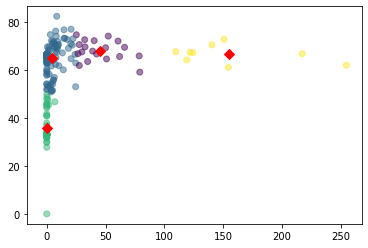

In [20]:
plt.scatter(final['distance'],final['skor'], c = final['predict'], alpha = 0.5)
centers = pd.DataFrame(model.cluster_centers_, columns = ['distance','skor'])
center_x = centers['distance']
center_y = centers['skor']
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

### Scaling with pipeline

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
scaler = StandardScaler()
model = KMeans(n_clusters = 4)
pipeline = make_pipeline(scaler, model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
